## Titanic project

Table of content
* 1. Preperation
    * 1.1. Import relevant librarie
    * 1.2. Load data from the file
* 2. Data overview
    * 2.1. Data dictionary
    * 2.2. Properties
    * 2.3. Features
    * 2.4. Null values
    * 2.5. Statistical distribution
    * 2.6. Data visualisation
* 3. Data cleaning
* 4. Choosing the best model

## 1. Preperation
### 1.1. Import relevent libraries

In [58]:
# data analysis
import pandas as pd
import numpy as np
from scipy import stats

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("Modules imported")

Modules imported


### 1.2. Load data from the file

In [59]:
# load train.csv to pandas data frame, using 'PassengerId' as the index
train_df = pd.read_csv('train.csv', )
test_df = pd.read_csv('test.csv')

# Preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data overview
### 2.1. Data dictionary

![Dictionary](dictionary.png)
### 2.2. Properties

In [60]:
print("There are {} rows and {} columns"
      .format(train_df.shape[0], train_df.shape[1]))

There are 891 rows and 12 columns


In [61]:
# print basic summary of the dataset
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### 2.3. Features
The dataset contains 3 data types. We will assume that float64 represent continuos data, int64 represents descrete data and object represents categorical data.
* Continuos data: age, fare.
* Descrete data: survived, pclass, sibsp, parch.
* Categorical data: name, sex, cabin, embarked

## 2.4. Null values

In [62]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* As we can see cabin is null 687 out of 891 instances. Any imputation would likely introduce signficant bias. We can drop this feature.
* Null values constitute minor portion of the data age(177 of 891) and embarked(2 of 891). Imputation of these features will have minimal impact of correliation.

### 2.5. Statistical distribution

Print statistical distribution of all data

In [63]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rugg, Miss. Emily",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Some observations:
* There are 577 male out of 891 which is 64.7%.
* There is only Fare max price of 512 which is much higher than mean value. We can consider to drop outlier values of fare column.

### 2.6. Data visualisation

Visualising each feature distribution 

**Survival by sex**

Precentage of female survived: 74.20382165605095 %
Precentage of male survived: 18.890814558058924 %


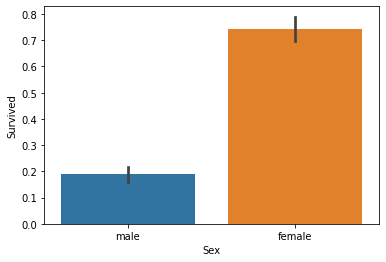

In [64]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train_df)

print("Precentage of female survived: {} %"
      .format(train_df['Survived'][train_df['Sex'] == 'female']
              .value_counts(normalize=True)[1]*100))

print("Precentage of male survived: {} %"
      .format(train_df['Survived'][train_df['Sex'] == 'male']
              .value_counts(normalize=True)[1]*100))

Significantly more female survived.

**Survival by Pclass**:

Precentage of 1 class survived: 0.6296296296296297 %
Precentage of 2 class survived: 0.47282608695652173 %
Precentage of 3 class survived: 0.24236252545824846 %
3    491
1    216
2    184
Name: Pclass, dtype: int64


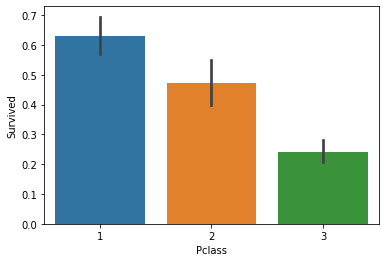

In [65]:
#draw bar plot of survival by sex
sns.barplot(x="Pclass", y="Survived", data=train_df)

print("Precentage of 1 class survived: {} %"
      .format(train_df['Survived'][train_df['Pclass'] == 1]
              .value_counts(normalize=True)[1]))

print("Precentage of 2 class survived: {} %"
      .format(train_df['Survived'][train_df['Pclass'] == 2]
              .value_counts(normalize=True)[1]))

print("Precentage of 3 class survived: {} %"
      .format(train_df['Survived'][train_df['Pclass'] == 3]
              .value_counts(normalize=True)[1]))

print(train_df['Pclass'].value_counts())

* We can see that the most people survived in 1 class by percentage scale
* Least people survived in 3 class by percentage scale.
* Most people comprised of 3 class.

**Survival by SibSp feature**

Precentage of 0 SibSp survived: 34.53947368421053 %
Precentage of 1 SibSp survived: 53.588516746411486 %
Precentage of 2 SibSp survived: 46.42857142857143 %
Precentage of 3 SibSp survived: 25.0 %
Precentage of 4 SibSp survived: 16.666666666666664 %
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


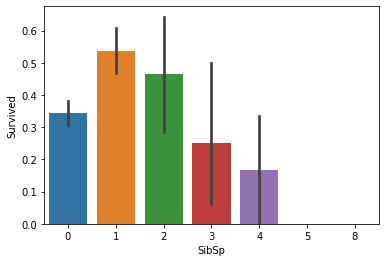

In [66]:
sns.barplot(x="SibSp", y="Survived", data=train_df)

print("Precentage of 0 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 0]
              .value_counts(normalize=True)[1]*100))

print("Precentage of 1 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 1]
              .value_counts(normalize=True)[1]*100))

print("Precentage of 2 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 2]
              .value_counts(normalize=True)[1]*100))

print("Precentage of 3 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 3]
              .value_counts(normalize=True)[1]*100))

print("Precentage of 4 SibSp survived: {} %"
      .format(train_df['Survived'][train_df['SibSp'] == 4]
              .value_counts(normalize=True)[1]*100))

print(train_df['SibSp'].value_counts())

* The majority of people constitute in 0 and 1 SibSp
* 34% of people in 0 SibSp survived
* 53% of people in 1 SibSp survived 
* None of people in 5 and 8 SibSp survived
* It is clear that people with more siblings were less likely to survive

**Survival by parch**

The percentage of survived people who had 0 parents/children aboard: 0.34365781710914456 %
0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


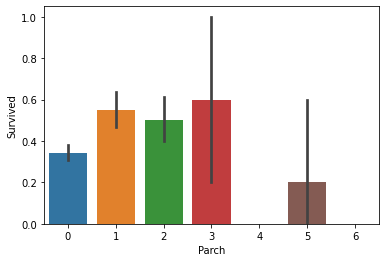

In [67]:
sns.barplot(x="Parch", y="Survived", data=train_df)

print("The percentage of survived people who had 0 parents/children aboard: {} %"
      .format(train_df['Survived'][train_df['Parch'] == 0]
              .value_counts(normalize=True)[1]))
print(train_df['Parch'].value_counts(normalize=True)*100)

* The majority of people who had 0 parents/children aboard constitute this feature.
* 1 and 2 parents/children aboard constitute also significant proportion of dataset.
* The least people(in percentage scale) survived with 0 parents/children aboard.

**Survival by age**

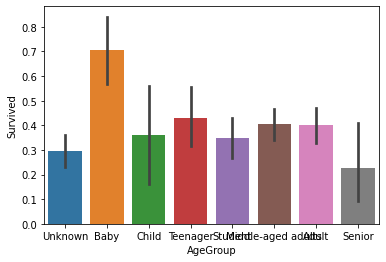

In [68]:
# fill empty values with -0.5
train_df['Age'] = train_df["Age"].fillna(-0.5)
test_df['Age'] = train_df["Age"].fillna(-0.5)

# creating interval array
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]

# creating labels for each interval
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Middle-aged adults', 'Adult', 'Senior']

# adding new grouped age columns
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels=labels)

# drawing a bar plot of age groups
sns.barplot(x="AgeGroup", y="Survived", data=train_df)
plt.show()

Babies are more likely to survive than other age groups

## 3. Data cleaning

### Cabin feature

Drop cabin column since there is significant amount of values missing

In [69]:
train_df.drop('Cabin', axis='columns', inplace=True)
test_df.drop('Cabin', axis='columns', inplace=True)

### Ticket feature
We will also drop the ticket feature since it has 681 unique values.

In [70]:
train_df.drop('Ticket', axis='columns', inplace=True)
test_df.drop('Ticket', axis='columns', inplace=True)

### Embarked feature
Now we need to fill in the missing values of Embarked feature

In [71]:
print("People who embarked in Southcampton (S): {}"
      .format(train_df[train_df["Embarked"] == "S"].shape[0]))

print("People who embarked in Cerbourg (C): {}"
      .format(train_df[train_df["Embarked"] == "C"].shape[0]))

print("People who embarked in Queenstown (Q): {}"
      .format(train_df[train_df["Embarked"] == "Q"].shape[0]))

People who embarked in Southcampton (S): 644
People who embarked in Cerbourg (C): 168
People who embarked in Queenstown (Q): 77


It is clear that most people embarked in Southcampton. There are mere a few values missing. Therefore we will place S in these places. 

In [72]:
train_df = train_df.fillna({"Embarked": "S"})

### Age feature

* We will need to fill in the missing values of the age group which are named 'unknown' at the moment. There is higher percentage of values missing we will try to find a way to predict these values.
* First, we will seperate into smaller title groups
* Second, we will predict the missing Age value from the most common age for their title

In [73]:
# create a combined group of both datasets
combine = [train_df, test_df]
string = ""

#  replace various title with more common names
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)


In [74]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [75]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [76]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Middle-aged adults,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Middle-aged adults,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Middle-aged adults,1


Predicting missing age values from the most common age for their title

In [77]:
pd.crosstab(train_df['Title'], train_df['AgeGroup'])

AgeGroup,Unknown,Baby,Child,Teenager,Student,Middle-aged adults,Adult,Senior
Title,,,,,,,,
1,119,0,1,34,88,146,111,18
2,36,21,11,29,35,33,19,1
3,17,0,0,7,14,37,49,2
4,4,23,13,0,0,0,0,0
5,0,0,0,0,0,1,1,0
6,1,0,0,0,1,3,15,1


This table shows what age group each title should be assigned for. 
* 1: Middle-aged adults
* 2: Student
* 3: Middle-aged adults
* 4: Baby
* 5: Middle-aged adults
* 6: Adult

In [78]:
# Mapping most popular group of age to its title
age_title_mapping = {1: "Middle-aged adults", 2: "Student", 3: "Middle-aged adults"
                     , 4: "Baby", 5: "Middle-aged adults", 6: "Adult"}

for x in range(len(train_df["AgeGroup"])):
    if train_df['AgeGroup'][x] == "Unknown":
        train_df['AgeGroup'][x] = age_title_mapping[train_df['Title'][x]]
        
for x in range(len(test_df["AgeGroup"])):
    if test_df['AgeGroup'][x] == "Unknown":
        test_df['AgeGroup'][x] = age_title_mapping[test_df['Title'][x]]

We added missing values of the age group. Now we can add them to a numeric values.
* Baby: 1
* Child: 2
* Teenager: 3
* Student: 4
* Middle-aged adults: 5
* Adult: 6
* Senior: 7

In [79]:
# mapping age group values to a numeric values
age_mapping = {"Baby": 1, "Child": 2, "Teenager": 3,
              "Student": 4, "Middle-aged adults": 5, "Adult": 6, "Senior": 7}

train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping)
test_df['AgeGroup'] = test_df['AgeGroup'].map(age_mapping)

# dropping Age feature since we created AgeGroup column
train_df.drop('Age', axis=1, inplace=True)
test_df.drop('Age', axis=1, inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,1


### Sex feature
Mapping sex group to numeric values:
* Male: 1
* Female: 2

In [80]:
sex_mapping = {"male": 1, "female": 2}
train_df["Sex"] = train_df["Sex"].map(sex_mapping)
test_df["Sex"] = test_df["Sex"].map(sex_mapping)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,7.2500,S,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,71.2833,C,6.0,3
2,3,1,3,"Heikkinen, Miss. Laina",2,0,0,7.9250,S,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,53.1000,S,5.0,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,8.0500,S,5.0,1


### Name feature

We will drop name feature since it cannot provide anymore useful information.


In [81]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,1,1,0,7.2500,S,4.0,1
1,2,1,1,2,1,0,71.2833,C,6.0,3
2,3,1,3,2,0,0,7.9250,S,5.0,2
3,4,1,1,2,1,0,53.1000,S,5.0,3
4,5,0,3,1,0,0,8.0500,S,5.0,1


### Embarked feature

Mapping Embarked feature to numeric values:
* S: 1
* C: 2
* Q: 3


In [82]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df["Embarked"] = train_df["Embarked"].map(embarked_mapping)
test_df["Embarked"] = test_df["Embarked"].map(embarked_mapping)
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,1,1,0,7.2500,1,4.0,1
1,2,1,1,2,1,0,71.2833,2,6.0,3
2,3,1,3,2,0,0,7.9250,1,5.0,2
3,4,1,1,2,1,0,53.1000,1,5.0,3
4,5,0,3,1,0,0,8.0500,1,5.0,1


### Fare feature

We will fill in the missing Fare values in the test set. Then the seperation of Fare feature into logical groups will be added. Fare feature will be dropped.

In [86]:
for x in range(len(test_df["Fare"])):
    if pd.isnull(test_df["Fare"][x]):
        pclass = test_df["Pclass"][x]
        test_df["Fare"][x] = round(train_df[train_df["Pclass"] == pclass]["Fare"].mean(), 4)
        
# Map Fare values into groups of numeric values
train_df['FareGroup'] = pd.qcut(train_df['Fare'], 4, labels = [1, 2, 3, 4])
test_df['FareGroup'] = pd.qcut(test_df['Fare'], 4, labels = [1, 2, 3, 4])

# dropping fare features
train_df.drop('Fare', axis=1, inplace=True)
test_df.drop('Fare', axis=1, inplace=True)

train_df.head()

<ipython-input-86-fde221ee8a21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Fare"][x] = round(train_df[train_df["Pclass"] == pclass]["Fare"].mean(), 4)


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareGroup
0,1,0,3,1,1,0,1,4.0,1,1
1,2,1,1,2,1,0,2,6.0,3,4
2,3,1,3,2,0,0,1,5.0,2,2
3,4,1,1,2,1,0,1,5.0,3,4
4,5,0,3,1,0,0,1,5.0,1,2


Checking train dataset

In [89]:
print(train_df.head())
print(train_df.info())

   PassengerId  Survived  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  \
0            1         0       3    1      1      0         1       4.0   
1            2         1       1    2      1      0         2       6.0   
2            3         1       3    2      0      0         1       5.0   
3            4         1       1    2      1      0         1       5.0   
4            5         0       3    1      0      0         1       5.0   

   Title FareGroup  
0      1         1  
1      3         4  
2      2         2  
3      3         4  
4      1         2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch       

Checking train dataset

In [91]:
print(test_df.head())
print(test_df.info())

   PassengerId  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  Title FareGroup
0          892       3    1      0      0         3       4.0      1         1
1          893       3    2      1      0         1       6.0      3         1
2          894       2    1      0      0         3       5.0      1         2
3          895       3    1      0      0         1       5.0      1         2
4          896       3    2      1      1         1       5.0      3         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    int64   
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Embarked     418 non-null    int64   
 6   AgeGroup     418 non-null    float64 
 7   Title        418 non-null    i

## 4. Choosing best ML model
Datasets contain all non-null numeric values. Now we can split training data(20% in our case) and test the accuracy of our different models. 

In [96]:
from sklearn.model_selection import train_test_split

predicators = train_df.drop(["Survived", "PassengerId"], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predicators, target, test_size = 0.2, random_state = 0)


Testing different ML models:
* Logistic Regression
* Gaussian Naive Bayes
* Support vector machines

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.77
